**Overall goal:**

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.


In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

data = pd.read_csv('gdrive/My Drive/Colab Notebooks/marketing_data.csv')

data.head()

Mounted at /content/gdrive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data.columns = data.columns.str.replace(' ', '')

data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype('float')

data.head()

<ipython-input-4-dcb911b904f9>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace('$', '')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Are there any null values or outliers? How will you wrangle/handle them?

**Section 01: Exploratory Data Analysis**

Are there any null values or outliers? How will you wrangle/handle them?


In [5]:
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<Figure size 1500x400 with 0 Axes>

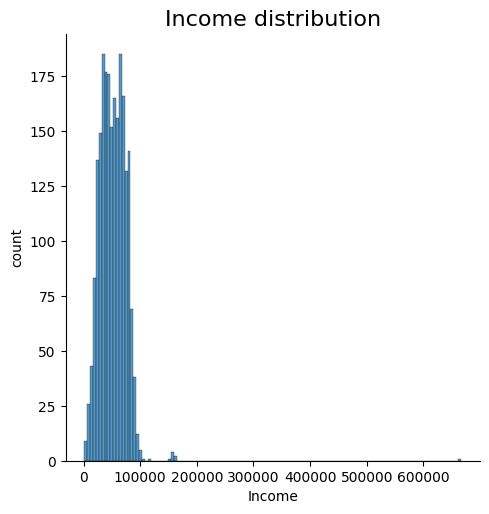

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))
sns.displot(data['Income'], kde=False)
plt.title('Income distribution', size=16)
plt.ylabel('count');

Findings:
- Most incomes are distributed between $0-\$100,000, with a few outliers
- Will impute null values with median value, to avoid effects of outliers on imputation value

<Axes: >

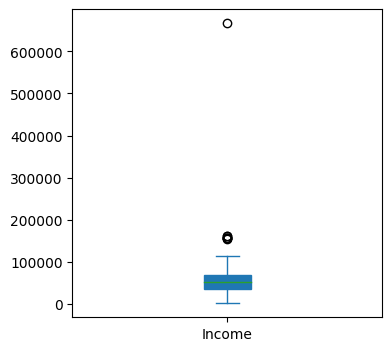

In [7]:
data['Income'].plot(kind='box', figsize=(4,4), patch_artist=True)

In [8]:
data['Income'] = data['Income'].fillna(data['Income'].median())

Outliers: Identify features containing outliers

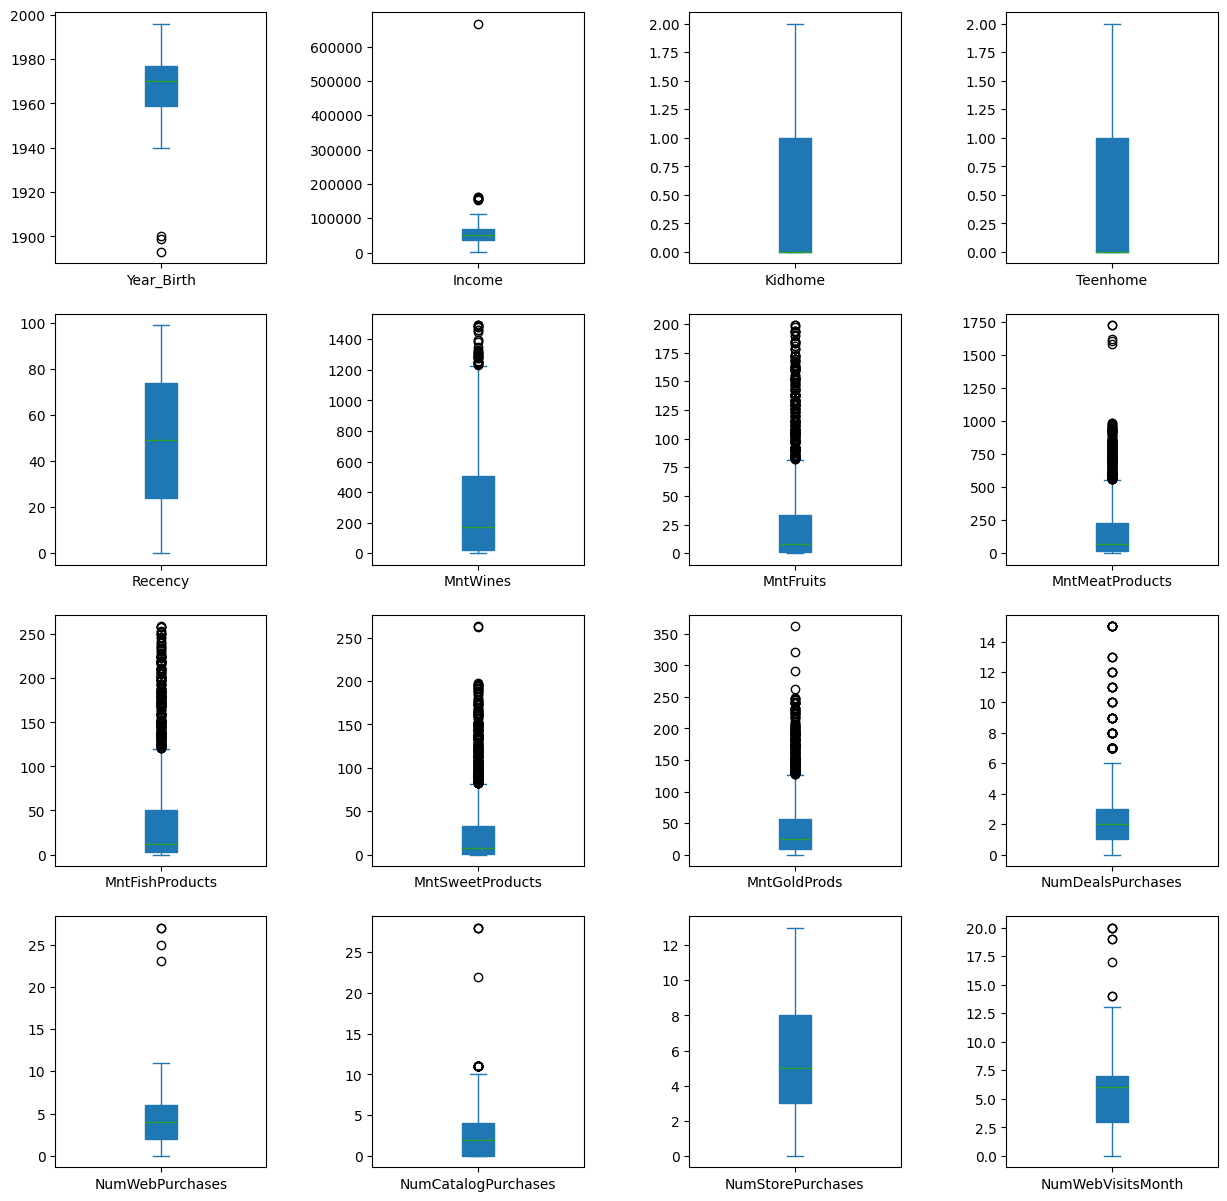

In [9]:
import numpy as np

data_to_plot = data.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],).select_dtypes(include=np.number)

data_to_plot.plot(subplots=True, layout=(4,4), kind='box', patch_artist=True, figsize=(15,15))
plt.subplots_adjust(wspace=0.5)
plt.show()

Findings: Multiple features contain outliers (see boxplots below), but the only that likely indicate data entry errors are Year_Birth <= 1900

Remove rows where Year_Birth <= 1900

<Axes: >

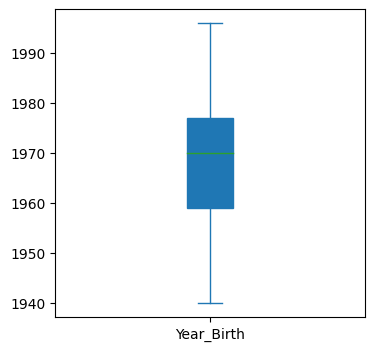

In [10]:
data = data[data['Year_Birth']>1900].reset_index(drop=True)

plt.figure(figsize=(4,4))
data['Year_Birth'].plot(kind='box', patch_artist=True)

**Are there any variables that warrant transformations?**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

Findings: The Dt_Customer column should be transformed to datetime format

In [12]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

**Are there any useful variables that you can engineer with the given data?**

- The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
- The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
- The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
- The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
- The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [13]:
data['Dependents'] = data['Kidhome'] + data['Teenhome']

data['Year_Customer'] = pd.DatetimeIndex(data['Dt_Customer']).year

mnt_cols = [col for col in data.columns if 'Mnt' in col]
data['TotalMnt'] = data[mnt_cols].sum(axis=1)

purchase_cols = [col for col in data.columns if 'Purchases' in col]
data['TotalPurchases'] = data[purchase_cols].sum(axis=1)

campaign_cols = [col for col in data.columns if 'Cmp' in col] + ['Response']
data['TotalCampaignsAcc'] = data[campaign_cols].sum(axis=1)

data[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


**Do you notice any patterns or anomalies in the data? Can you plot them?**

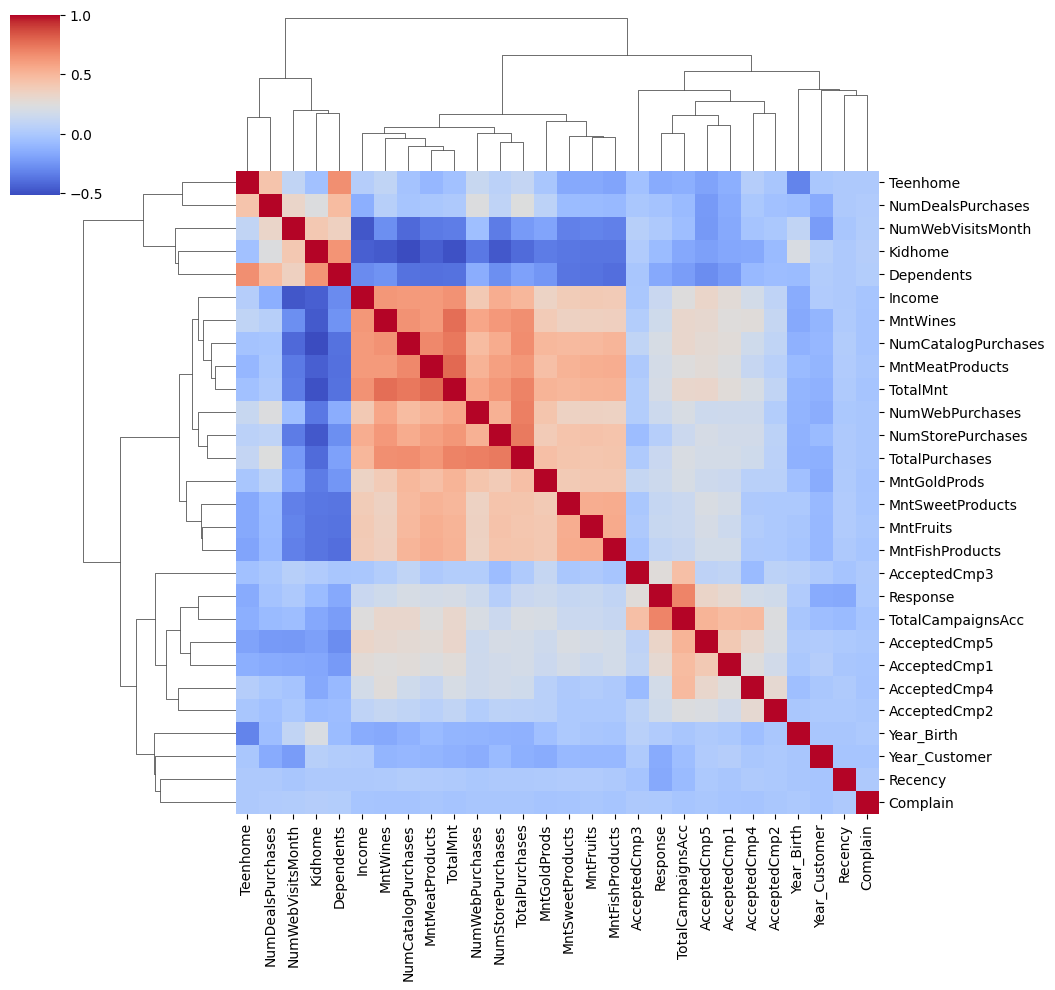

In [ ]:
import numpy as np
import seaborn as sns

corr = data.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')

sns.clustermap(corr, cbar_pos=[-0.05, 0.8, 0.05, 0.18], cmap='coolwarm')

- Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.
- From this heatmap we can observe the following clusters of correlated features:
 1. The "**High Income**" cluster:
 -  Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
 - Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'
 2. The "**Have Kids & Teens**" cluster:
 - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'Dependents' (with a stronger effect from kids vs. teens)
 - Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'
 3. The "**Advertising Campaigns**" cluster:
 - Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
 - Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster.


- Anomalies:
  - Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
  - Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website


Plot illustrating the effect of high income on spending:

Note: For the purposes of this plot, limiting income to < 200000 to remove outlier

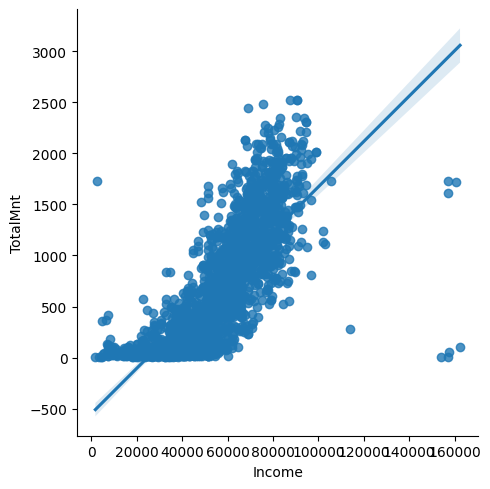

In [ ]:
sns.lmplot(x='Income', y='TotalMnt', data= data[data['Income']<200000])

Plot illustrating negative effect of having dependents (kids & teens) on spending:

<Axes: xlabel='Dependents', ylabel='TotalMnt'>

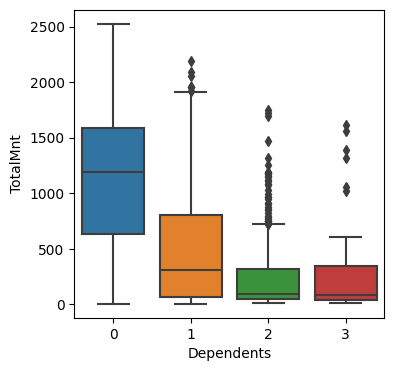

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=data)

Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

<Axes: xlabel='Dependents', ylabel='NumDealsPurchases'>

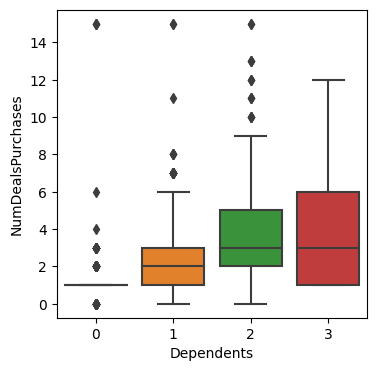

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=data)

Plots illustrating the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance:

Note: For the purposes of the following plot, limiting income to < 200000 to remove outlier

<Axes: xlabel='TotalCampaignsAcc', ylabel='Income'>

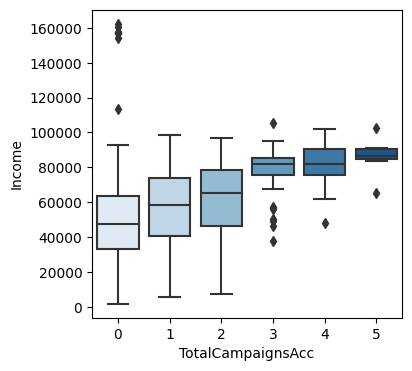

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=data[data['Income']<200000], palette="Blues")

<Axes: xlabel='TotalCampaignsAcc', ylabel='Dependents'>

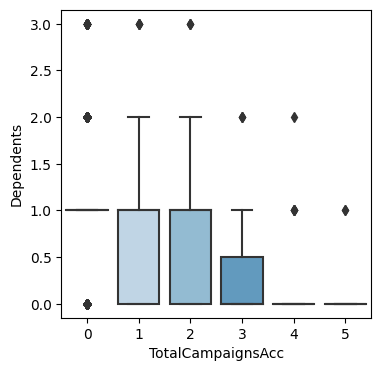

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=data, palette="Blues")

Investigate anomaly: 
- Number of web visits in the last month is not positively correlated with number of web purchases. 
- Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumDealsPurchases'>

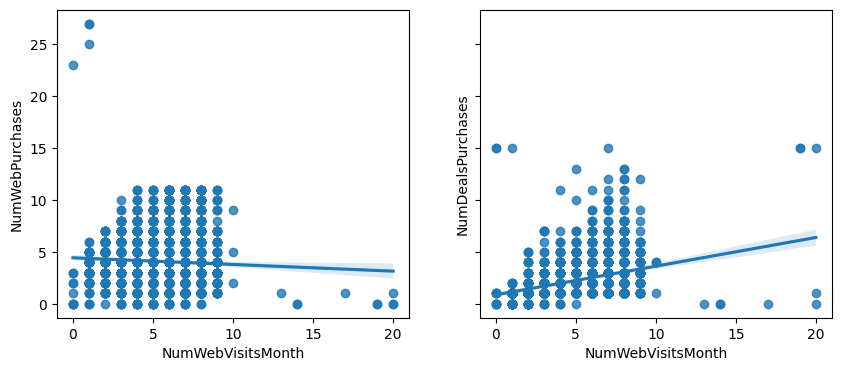

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
sns.regplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data,  ax=ax[0])
sns.regplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=data,  ax=ax[1])

# **Section 02: Statistical Analysis**

**What factors are significantly related to the number of store purchases?**
- We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
- Begin by plotting the target variable:

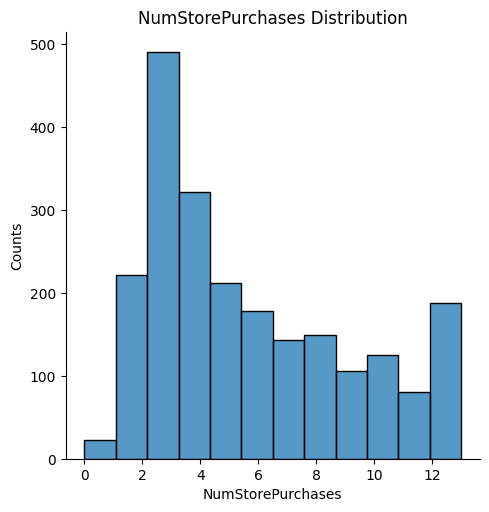

In [ ]:
sns.displot(data['NumStorePurchases'], kde=False, bins=12)
plt.title('NumStorePurchases Distribution')
plt.ylabel('Counts')
plt.show()

Drop uninformative features
- ID is unique to each customer
- Dt_Customer will be dropped in favor of using engineered variable Year_Customer

Perform one-hot encoding of categorical features

In [ ]:
data.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

cat_features = data.select_dtypes(exclude=np.number)

enc = OneHotEncoder(sparse=False).fit(cat_features)
catFeatures_enc = pd.DataFrame(enc.transform(cat_features))
catFeatures_enc.columns = enc.get_feature_names_out(cat_features.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
rem_col = data.drop(columns=cat_features.columns)

new_data = pd.concat([catFeatures_enc, rem_col], axis=1)
new_data.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,1,2014,91,8,2


- Fit linear regression model to training data (70% of dataset)
- Evaluate predictions on test data (30% of dataset) using RMSE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = new_data.drop(columns=['NumStorePurchases'])
y = new_data['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.239754174836255e-14
Median value of target variable:  5.0


Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=b755a9450528a9fdfc5cc20fdb63e540746a00844bd80805fba01d30c013728b
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


Identify features that significantly affect the number of store purchases, using permutation importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

Significant features:
- 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
- All other features are not significant

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 16.4 MB/s eta 0:00:00


Explore the directionality of these effects, using SHAP values

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


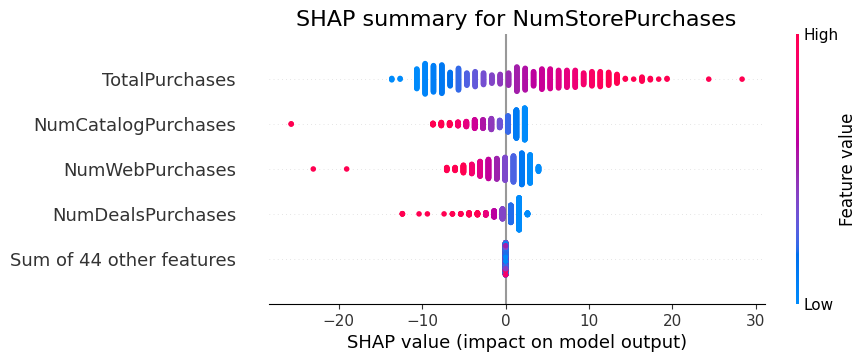

In [ ]:
import shap

ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

Findings:
- The number of store purchases increases with higher number of total purchases ('TotalPurchases')
- The number of store purchases decreases with higher number of catalog, web, or deals purchases ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases')

Interpretation:
- Customers who shop the most in stores are those who shop less via the catalog, website, or special deals

**Does US fare significantly better than the Rest of the World in terms of total purchases?**
- Plot total number of purchases by country

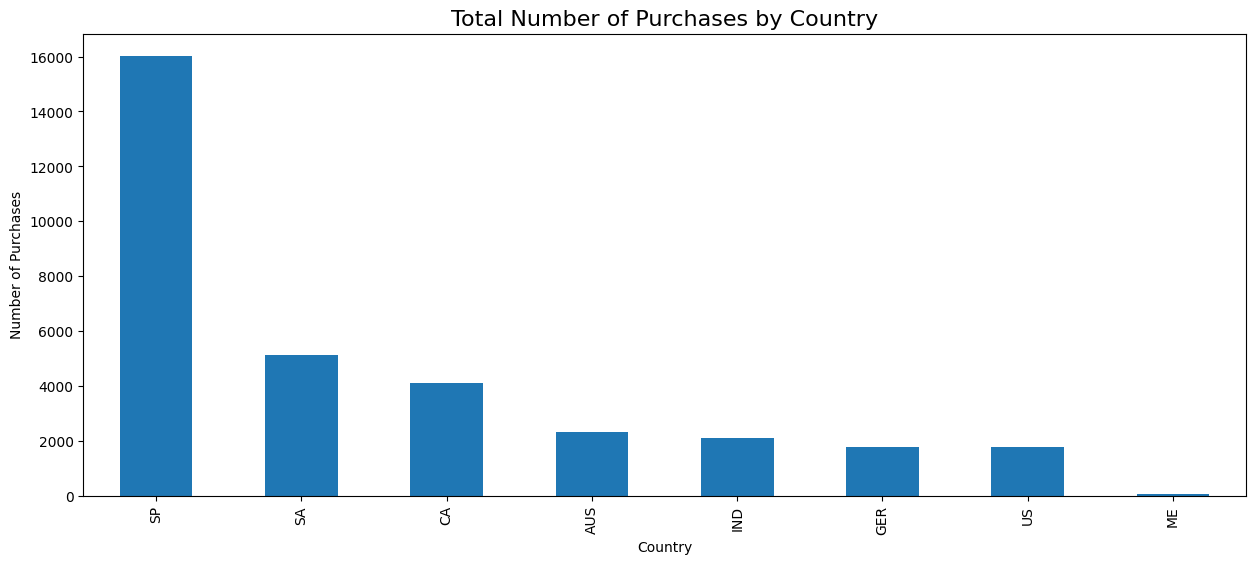

In [ ]:
plt.figure(figsize=(15,6))
data.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

Findings:
- Spain (SP) has the highest number of purchases
- US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

Plot total amount spent by country

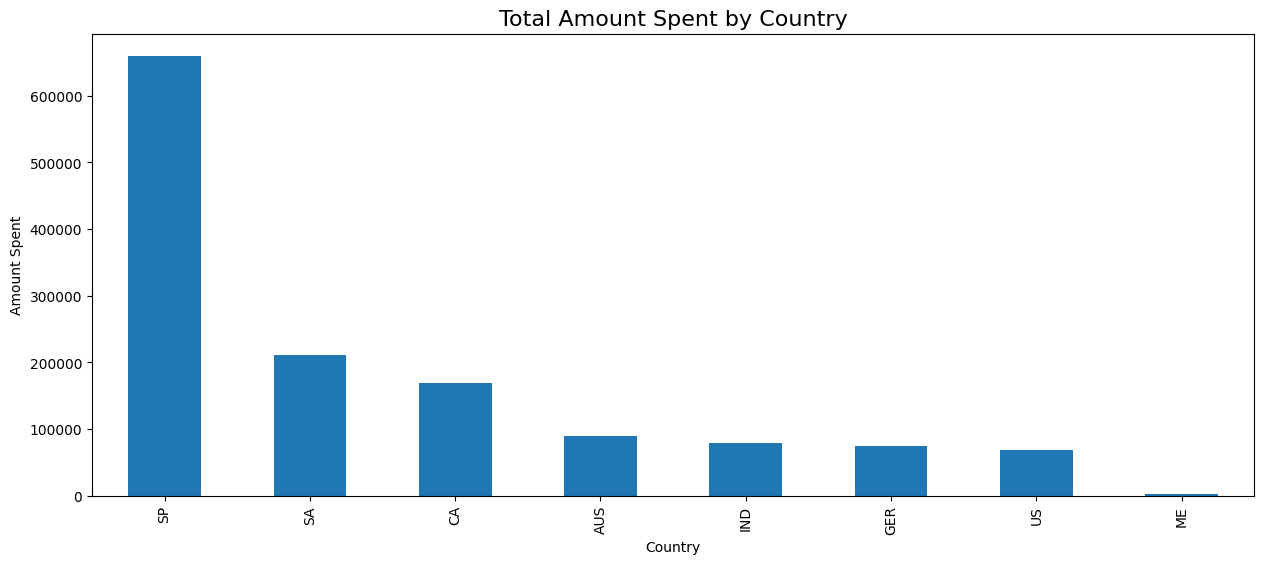

In [ ]:
plt.figure(figsize=(15,6))
data.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

Findings:
- Spain (SP) has the highest total amount spent on purchases
- US is second to last, therefore the US does not fare better than the rest of the world in terms of the total amount spent on purchases

**Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test**

- Plot relationship between amount spent on gold in the last 2 years (MntGoldProds) and number of in store purchases (NumStorePurchases)

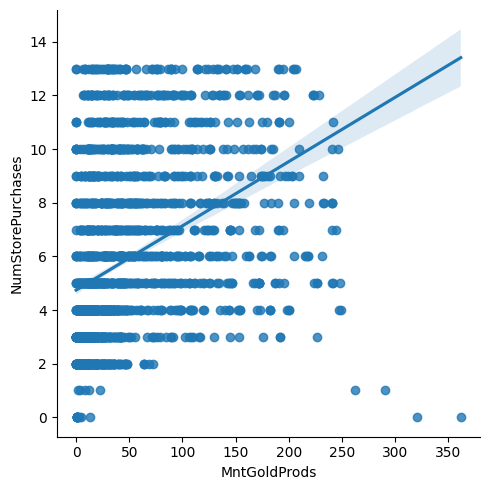

In [ ]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data=data)

Findings: There is a positive relationship, but is it statistically significant?

Perform Kendall correlation analysis (non-parametric test since MntGoldProducts is not normally distributed and contains outliers):

In [ ]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=data['MntGoldProds'], y=data['NumStorePurchases'])

print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


Findings: There is significant positive correlation between MntGoldProds and NumStorePurchases

**Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?**

- We will compare MntFishProducts between Married PhD candidates and all other customers

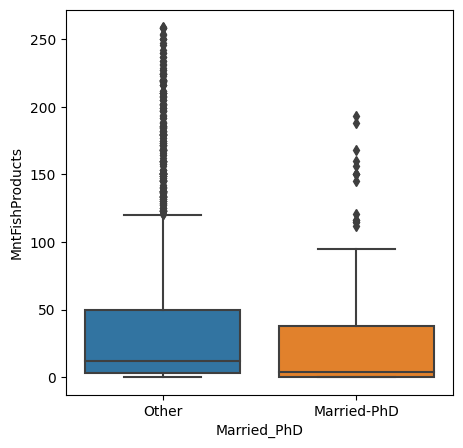

In [ ]:
new_data['Married_PhD'] = new_data['Marital_Status_Married'] + new_data['Education_PhD']
new_data['Married_PhD'] = new_data['Married_PhD'].replace({2: 'Married-PhD', 1:'Other', 0:'Other'})

plt.figure(figsize=(5,5))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=new_data);

Findings: Married PhD candidates spend significantly less on fish products compared to other customers.

In [ ]:
from scipy.stats import  ttest_ind

pval = ttest_ind(new_data[new_data['Married_PhD']=='Married-PhD']['MntFishProducts'], new_data[new_data['Married_PhD']=='Other']['MntFishProducts']).pvalue

print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.005


In [ ]:
new_data.drop(columns=['Married_PhD'], inplace=True)

**What other factors are significantly related to amount spent on fish?**
- Like with the analysis of NumStorePurchases above, we will use use a linear regression model with MntFishProducts as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish
- Begin by plotting the target variable:

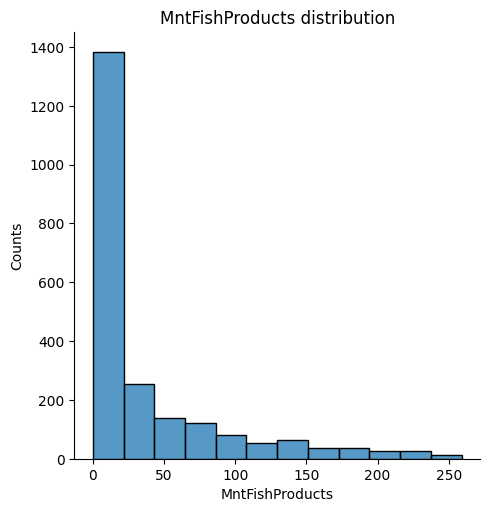

In [ ]:
sns.displot(data['MntFishProducts'], kde=False, bins=12)
plt.title("MntFishProducts distribution")
plt.ylabel('Counts');

- Fit linear regression model to training data (70% of dataset)
- Evaluate predictions on test data (30% of dataset) using RMSE

In [ ]:
X = new_data.drop(columns=['MntFishProducts'])
y = new_data['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.148798766767868e-13
Median value of target variable:  12.0


Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

Identify features that significantly affect the amount spent on fish, using permutation importance:

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Significant features:
- 'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
- All other features are not significant

Explore the directionality of these effects, using SHAP values

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


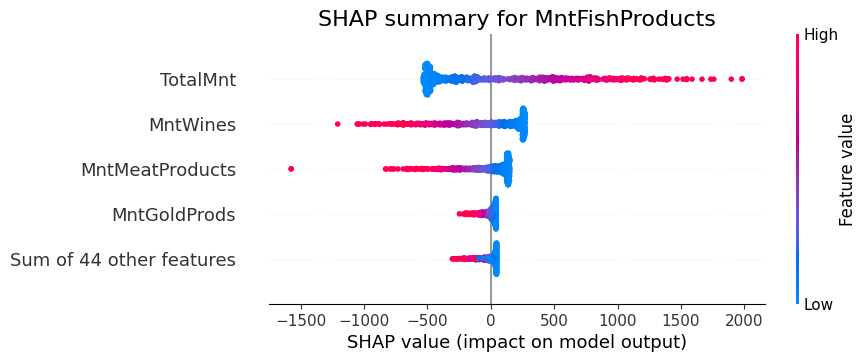

In [ ]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

Findings:
- The amount spent on fish increases with higher total amount spent ('TotalMnt')
- The amount spent on fish decreases with higher amounts spent on wine, meat, gold, fruit, or sweets ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')

Interpretation:
- Customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)

**Is there a significant relationship between geographical regional and success of a campaign?**
- Plot success of campaigns by region

In [ ]:
data['Country_code'] = data['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

data_cam = data[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')

data_cam = pd.DataFrame(data_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

data_cam['Campaign'] = data_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

In [ ]:
import plotly.express as px

fig = px.choropleth(data_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )

fig.show()

Findings:
- The campaign acceptance rates are low overall
- The campaign with the highest overall acceptance rate is the most recent campaign (column name: Response)
- The country with the highest acceptance rate in any campaign is Mexico

Is the effect of region on campaign success statistically significant?

Statistical summary of regional effects on campaign success:

*   Methodology: Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.


In [ ]:
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## get the data of interest for glm
data_cam_wide = data[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat_results = []

## perform glm
for col in data_cam_wide.drop(columns='Country').columns:
    this_data = data_cam_wide[['Country', col]]
    
    # define formula
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Wed, 26 Apr 2023   Deviance:                       1065.0
Time:                        19:05:10   Pearson chi2:                 2.23e+03
No. Iterations:                    20   Pseudo R-squ. (CS):           0.001563
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



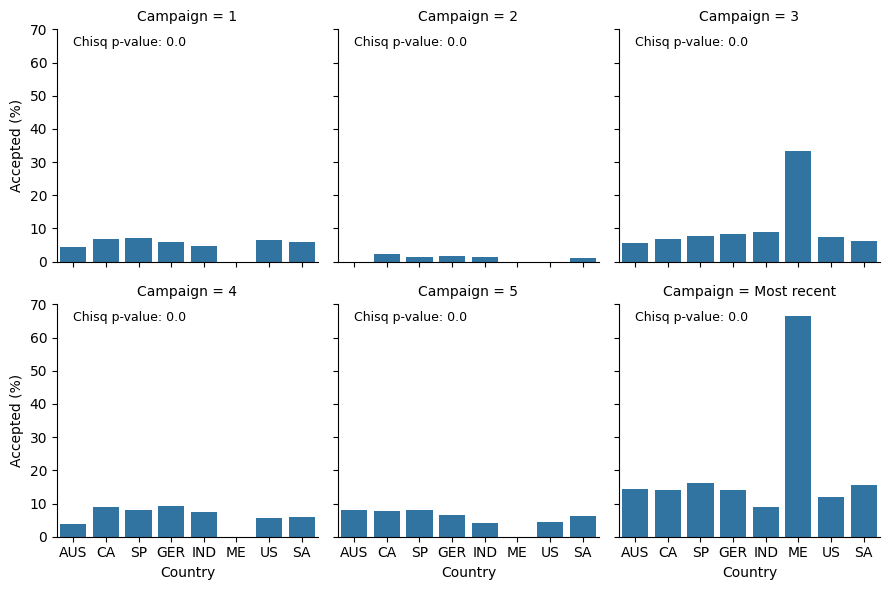

In [ ]:
# plotting
## merge in the original country codes provided in the dataset
countries = data[['Country', 'Country_code']].drop_duplicates().reset_index(drop=True)
data_cam2 = data_cam.merge(countries, how='left', on='Country_code')
data_cam2.head()

## bar graphs
g = sns.FacetGrid(data_cam2, col='Campaign', col_wrap=3)
g.map(sns.barplot, 'Country', 'Accepted (%)')
for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval), fontsize=9)

Findings: The regional differences in advertising campaign success are statistically significant.

# **Section 03: Data Visualization**

**Which marketing campaign is most successful?**
- Plot marketing campaign overall acceptance rates

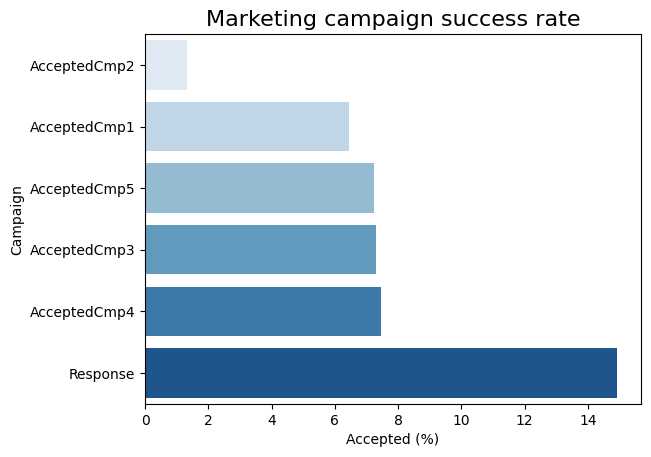

In [ ]:
cam_data = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean().sort_values()*100

sns.barplot(x=cam_data.values, y=cam_data.index, palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

Findings: The most successful campaign is the most recent (column name: Response)

**What does the average customer look like for this company?**

In [ ]:
binary_col = [col for col in data.columns if 'Accepted' in col] + ['Response', 'Complain']

spend_col = [col for col in data.columns if 'Mnt' in col]

channel_col = [col for col in data.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

demographics = pd.DataFrame(round(data.drop(columns=binary_col + spend_col + channel_col).mean(), 1), columns=['Average']).reindex(['Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

<ipython-input-25-f936a751d40a>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  demographics = pd.DataFrame(round(data.drop(columns=binary_col + spend_col + channel_col).mean(), 1), columns=['Average']).reindex(['Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])


,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


Basic demographics: The average customer is...
- Born in 1969
- Became a customer in 2013
- Has an income of roughly $52,000 per year
- Has 1 dependent (roughly equally split between kids or teens)
- Made a purchase from our company in the last 49 days

**Which products are performing best?**

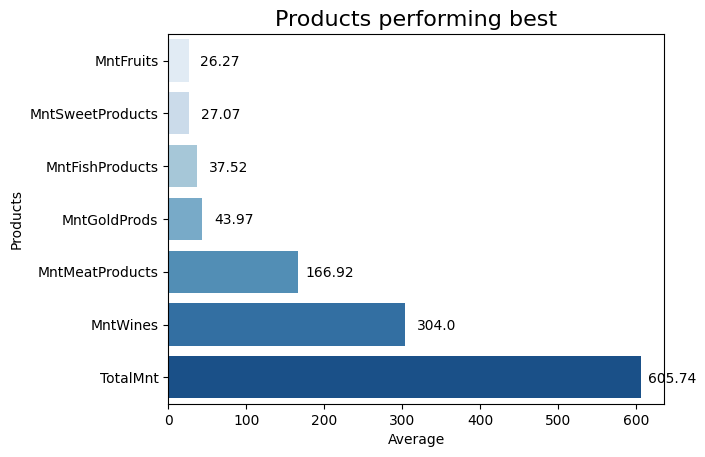

In [ ]:
product_data = data[spend_col].mean().sort_values()

ax = sns.barplot(x=np.round(product_data.values, 2), y=product_data.index, palette='Blues')
plt.xlabel('Average')
plt.ylabel('Products')
plt.title('Products performing best', size=16);

for p,q in zip(ax.patches, np.round(product_data.values, 2)):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

The average customer spent...
- Fruits, Sweets, Fish, or Gold products with 25-50.
- Over 160 on Meat products
- Over 300 on Wines
- Over 600 total

Products performing best:
- Wines
- Followed by meats

**Which channels are underperforming?**

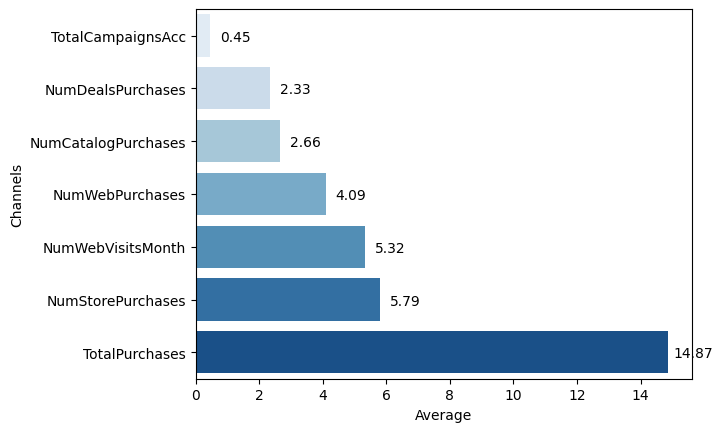

In [ ]:
channel_data = data[channel_col].mean().sort_values()

ax = sns.barplot(x=np.round(channel_data.values, 2), y=channel_data.index, palette='Blues')
plt.xlabel('Average')
plt.ylabel('Channels')

for p,q in zip(ax.patches, np.round(channel_data.values, 2)):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

Channels: The average customer...
- Accepted less than 1 advertising campaign
- Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
- Averaged 14 total purchases
- Visited the website 5 times

Underperforming channels:
- Advertising campaigns
- Followed by deals, and catalog

# **Conclusion**

Summary of actionable findings to improve advertising campaign success:

1.   The most successful advertising campaign was the most recent campaign 
(column name: Response), and was particularly successful in Mexico (>60% acceptance rate!)

  *   Suggested action: Conduct future advertising campaigns using the same model recently implemented in Mexico.


2. Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens

  *   Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens

3. The most successful products are wines and meats (i.e. the average customer spent the most on these items)

  *   Suggested action: Focus advertising campaigns on boosting sales of the less popular items

4. The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels). The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels)

  *  Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers